In [274]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [40]:
data=pd.read_csv('crime_data.csv')
data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [41]:
data.rename(columns={'Unnamed: 0':'state'},inplace=True)
data

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [43]:
data.isna().sum()

state       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [218]:
data.corr()

,Murder,Assault,UrbanPop,Rape,h_clusterid,labels
Murder,1.000000,0.801873,0.069573,0.563579,0.397146,-0.828856
Assault,0.801873,1.000000,0.258872,0.665241,0.264279,-0.836191
UrbanPop,0.069573,0.258872,1.000000,0.411341,-0.580338,-0.162966
Rape,0.563579,0.665241,0.411341,1.000000,0.080296,-0.698565
h_clusterid,0.397146,0.264279,-0.580338,0.080296,1.000000,-0.504499
labels,-0.828856,-0.836191,-0.162966,-0.698565,-0.504499,1.000000


array([[<AxesSubplot:title={'center':'Murder'}>,
        <AxesSubplot:title={'center':'Assault'}>],
       [<AxesSubplot:title={'center':'UrbanPop'}>,
        <AxesSubplot:title={'center':'Rape'}>]], dtype=object)

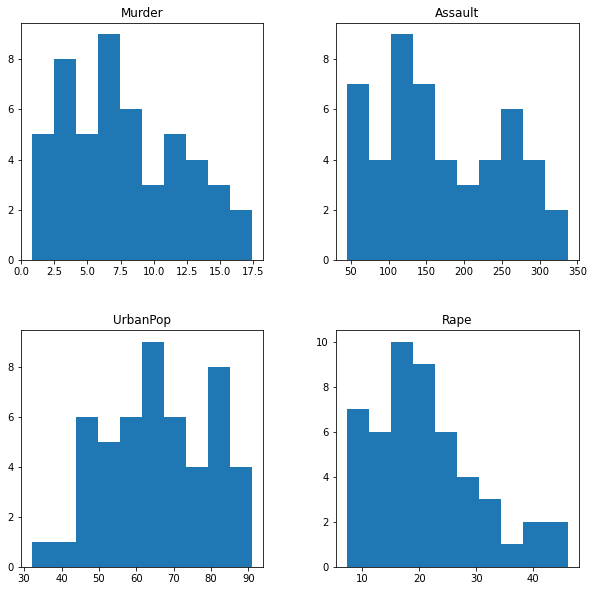

In [46]:
data.hist(figsize=(10,10),grid=False)

### Normalization function 

In [48]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [49]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(data.iloc[:,1:])

In [50]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Heirarchical Clustering

In [51]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

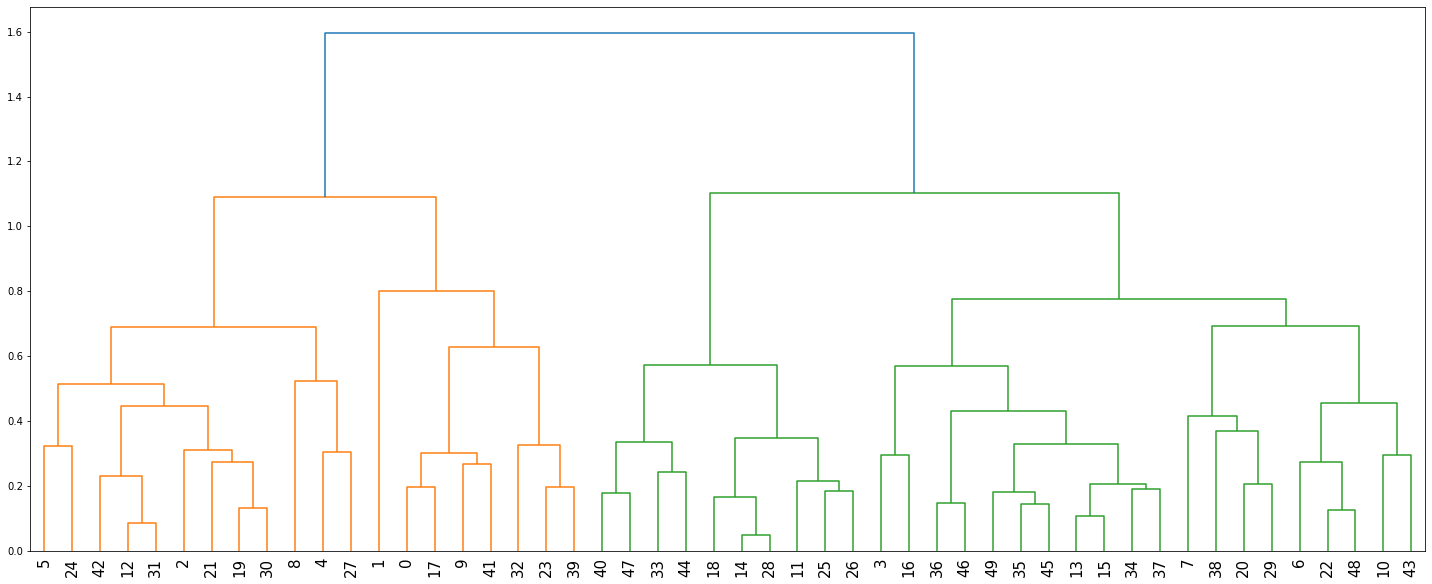

In [52]:
# create dendrogram
plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'),leaf_font_size=15)

In [53]:
??AgglomerativeClustering

In [54]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')

In [55]:
hc.fit_predict(df_norm)

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [56]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [57]:
data['h_clusterid'] = y_hc 

In [58]:
data

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [59]:
data.groupby(["h_clusterid"])["state"].apply(lambda x:tuple(x))

h_clusterid
0    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
1    (Arizona, California, Colorado, Florida, Illin...
2    (Idaho, Iowa, Maine, Montana, Nebraska, New Ha...
3    (Alabama, Georgia, Louisiana, Mississippi, Nor...
4                                            (Alaska,)
Name: state, dtype: object

In [60]:
data[data["state"].isin(["Arkansas","Montana","Louisiana"])]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid
3,Arkansas,8.8,190,50,19.5,0
17,Louisiana,15.4,249,66,22.2,3
25,Montana,6.0,109,53,16.4,2


In [61]:
data1=data.sort_values('h_clusterid')
data1.iloc[:,[0,-1]]

,state,h_clusterid
49,Wyoming,0
20,Massachusetts,0
29,New Jersey,0
16,Kentucky,0
15,Kansas,0
34,Ohio,0
13,Indiana,0
35,Oklahoma,0
22,Minnesota,0
10,Hawaii,0


# K mean

In [120]:
from sklearn.cluster import KMeans

In [284]:
model_kmeans = KMeans(n_clusters=2)
model_kmeans.fit(df_norm)

KMeans(n_clusters=2)

In [285]:
k_fit=model_kmeans.fit(df_norm)

In [286]:
k_fit.n_clusters

2

In [287]:
k_fit.cluster_centers_

array([[0.68463855, 0.72003425, 0.61694915, 0.56498708],
       [0.24518072, 0.23778539, 0.53615819, 0.22334195]])

In [288]:
sets=k_fit.labels_

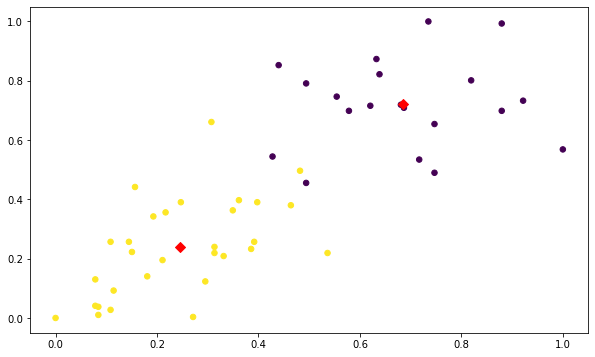

In [289]:
plt.figure(figsize=(10,6))
plt.scatter(df_norm.iloc[:,0], df_norm.iloc[:,1],c=sets, s = 30, cmap = "viridis")
centers = k_fit.cluster_centers_                           
plt.scatter(centers[:,0], centers[:,1], c = "red", s = 50, alpha =1,marker="D");

In [134]:
data["labels"]=pd.Series(model_kmeans.labels_)
data

,state,Murder,Assault,UrbanPop,Rape,h_clusterid,labels
0,Alabama,13.2,236,58,21.2,3,0
1,Alaska,10.0,263,48,44.5,4,0
2,Arizona,8.1,294,80,31.0,1,0
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,1,0
5,Colorado,7.9,204,78,38.7,1,0
6,Connecticut,3.3,110,77,11.1,0,1
7,Delaware,5.9,238,72,15.8,0,1
8,Florida,15.4,335,80,31.9,1,0
9,Georgia,17.4,211,60,25.8,3,0


In [135]:
data.groupby(["labels"])["state"].apply(lambda x:tuple(x))

labels
0    (Alabama, Alaska, Arizona, California, Colorad...
1    (Arkansas, Connecticut, Delaware, Hawaii, Idah...
Name: state, dtype: object

In [136]:
data[data["state"].isin(["Alaska","Arizona","California","California"])]

,state,Murder,Assault,UrbanPop,Rape,h_clusterid,labels
1,Alaska,10.0,263,48,44.5,4,0
2,Arizona,8.1,294,80,31.0,1,0
4,California,9.0,276,91,40.6,1,0


In [137]:
data2=data.sort_values('labels')
data2.iloc[:,[0,-1]]

,state,labels
0,Alabama,0
42,Texas,0
41,Tennessee,0
39,South Carolina,0
32,North Carolina,0
31,New York,0
30,New Mexico,0
27,Nevada,0
23,Mississippi,0
21,Michigan,0


# DBSCAN

In [138]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import MinMaxScaler

In [219]:
df=pd.read_csv('crime_data.csv')
df.rename(columns={'Unnamed: 0':"state"},inplace=True)
df.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [220]:
from sklearn.preprocessing import StandardScaler

In [221]:
stdscaler=StandardScaler()
x=pd.DataFrame(stdscaler.fit_transform(df.iloc[:,1:]),columns=df_norm.columns)
x

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


In [256]:
dbs=DBSCAN(min_samples=2,eps=0.7)
claas_pr=dbs.fit_predict(x.iloc[:,:2])

In [262]:
claas_pr

array([0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

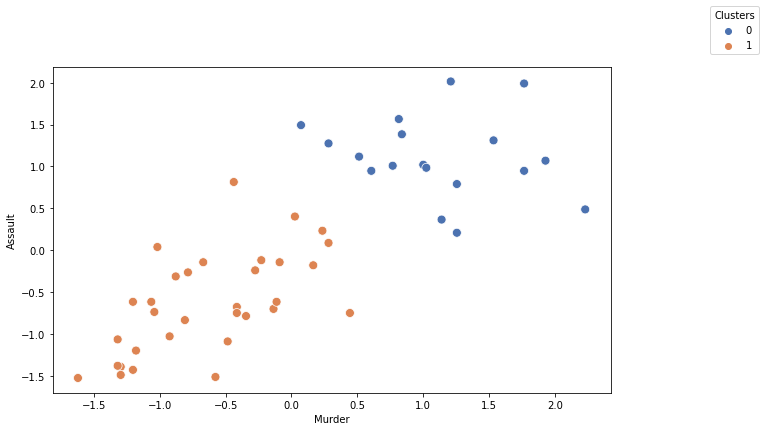

In [275]:
dbs=DBSCAN(min_samples=2,eps=0.7)
claas_pr=dbs.fit_predict(x.iloc[:,:2])
plt.figure(figsize=(10,6))
p = sns.scatterplot(data=x, x="Murder", y="Assault", hue=claas_pr, legend="full", palette="deep",s=80)
sns.move_legend(p, "upper left", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

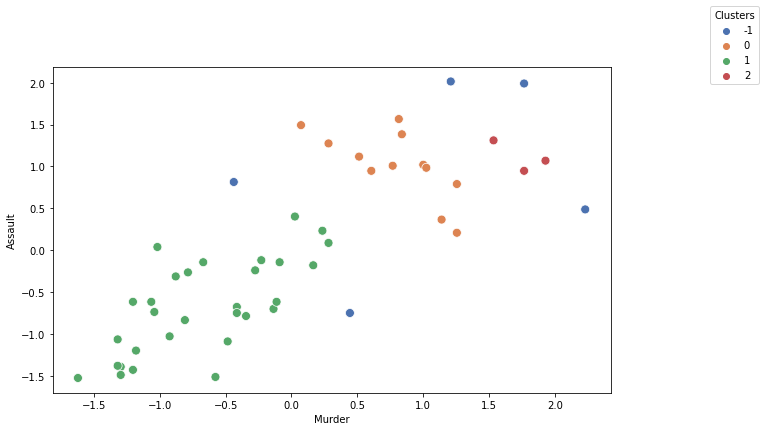

In [276]:
dbs=DBSCAN(min_samples=2,eps=0.5)
claas_pr=dbs.fit_predict(x.iloc[:,:2])
plt.figure(figsize=(10,6))
p = sns.scatterplot(data=x, x="Murder", y="Assault", hue=claas_pr, legend="full", palette="deep",s=80)
sns.move_legend(p, "upper left", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

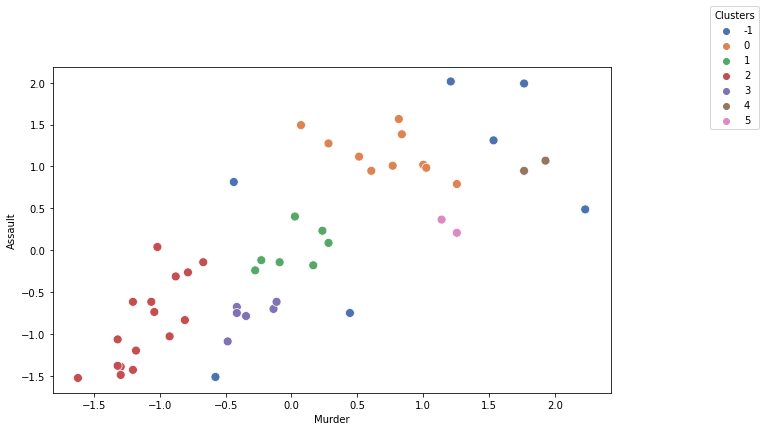

In [277]:
dbs=DBSCAN(min_samples=2,eps=0.4)
claas_pr=dbs.fit_predict(x.iloc[:,:2])
plt.figure(figsize=(10,6))
p = sns.scatterplot(data=x, x="Murder", y="Assault", hue=claas_pr, legend="full", palette="deep",s=80)
sns.move_legend(p, "upper left", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()